<a href="https://colab.research.google.com/github/ShrCodex/EDA_Theory_21BDS0315/blob/main/eda_theory_da1_21BDS0315.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Theory DA - 1

# Name: Shreyans Tawada
# RegNo: 21BDS0315

# Module 1: Introduction to Exploratory Data Analysis

## Step 1: Loading the dataset

In [34]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_csv('income.csv')
data.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,NaN,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


## Step 2: Exploring the dataset

In [35]:
data.shape

(8993, 14)

In [36]:
data.describe(include='all')

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
count,8993,8993,8833,8993,8907,8857,8080,8993,8618,3269,8753,8636,8925,8634
unique,9,2,5,7,6,9,5,3,9,9,3,5,8,3
top,-10.000),F,Single,25-34,1 to 3 years of college,Professional/Managerial,10+ years,Not Married,Two,One,Rent,House,White,English
freq,1745,4918,3654,2249,3066,2820,5182,5438,2664,1506,3670,5073,5811,7794


In [37]:
print("Missing Value Count")
data.isnull().sum()

Missing Value Count


,0
INCOME,0
SEX,0
MARITAL.STATUS,160
AGE,0
EDUCATION,86
OCCUPATION,136
AREA,913
DUAL.INCOMES,0
HOUSEHOLD.SIZE,375
UNDER18,5724


# Module 2: Data Transformation
## Step 1: Data Deduplication

In [38]:
# Checking for duplicate rows
duplicate_rows = data.duplicated()
print(f"No. of Duplicate Rows:\n{duplicate_rows.sum()}")

No. of Duplicate Rows:
668


In [39]:
# Removing duplicate rows
data.drop_duplicates(inplace=True)
print(f'Dataset after removing duplicates:\n{data.shape}')

Dataset after removing duplicates:
(8325, 14)


## Step 2: Handling Missing Data

In [40]:
# Before identifying missing values, we need to replace NaN in UNDER18 to Zero to avoid miscalculations
data['UNDER18'].fillna("Zero",inplace=True)
# Identifying missing values
missing_values = data.isnull().sum()
print(f"Missing Value Count in each column:\n{missing_values}")

Missing Value Count in each column:
INCOME              0
SEX                 0
MARITAL.STATUS    158
AGE                 0
EDUCATION          86
OCCUPATION        135
AREA              886
DUAL.INCOMES        0
HOUSEHOLD.SIZE    369
UNDER18             0
HOUSEHOLDER       235
HOME.TYPE         353
ETHNIC.CLASS       68
LANGUAGE          356
dtype: int64


<ipython-input-40-22c0b4c29cd1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['UNDER18'].fillna("Zero",inplace=True)


In [41]:
data.head()

,INCOME,SEX,MARITAL.STATUS,AGE,EDUCATION,OCCUPATION,AREA,DUAL.INCOMES,HOUSEHOLD.SIZE,UNDER18,HOUSEHOLDER,HOME.TYPE,ETHNIC.CLASS,LANGUAGE
0,[75.000-,F,Married,45-54,1 to 3 years of college,Homemaker,10+ years,No,Three,Zero,Own,House,White,NaN
1,[75.000-,M,Married,45-54,College graduate,Homemaker,10+ years,No,Five,Two,Own,House,White,English
2,[75.000-,F,Married,25-34,College graduate,Professional/Managerial,10+ years,Yes,Three,One,Rent,Apartment,White,English
3,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",10+ years,Not Married,Four,Two,Family,House,White,English
4,-10.000),F,Single,14-17,Grades 9 to 11,"Student, HS or College",4-6 years,Not Married,Four,Two,Family,House,White,English


In [42]:
data_cleaned = data.dropna()
print(f'Dataset after removing missing values:\n{data_cleaned.shape}')

Dataset after removing missing values:
(6251, 14)


In [44]:
print("Data after handling duplicates and missing values:")
print(data_cleaned.info())

Data after handling duplicates and missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 6251 entries, 1 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          6251 non-null   object
 1   SEX             6251 non-null   object
 2   MARITAL.STATUS  6251 non-null   object
 3   AGE             6251 non-null   object
 4   EDUCATION       6251 non-null   object
 5   OCCUPATION      6251 non-null   object
 6   AREA            6251 non-null   object
 7   DUAL.INCOMES    6251 non-null   object
 8   HOUSEHOLD.SIZE  6251 non-null   object
 9   UNDER18         6251 non-null   object
 10  HOUSEHOLDER     6251 non-null   object
 11  HOME.TYPE       6251 non-null   object
 12  ETHNIC.CLASS    6251 non-null   object
 13  LANGUAGE        6251 non-null   object
dtypes: object(14)
memory usage: 732.5+ KB
None


# Module 3: Comprehensive Analysis - Univariate, Bivariate, Multivariate Analysis

## Step 1: Analysing Non-Numeric Columns

In [45]:
non_numeric_count = data.select_dtypes(include=['object']).nunique()
print("Number of unique non-numeric values in each column:")
print(non_numeric_count)

Number of unique non-numeric values in each column:
INCOME             9
SEX                2
MARITAL.STATUS     5
AGE                7
EDUCATION          6
OCCUPATION         9
AREA               5
DUAL.INCOMES       3
HOUSEHOLD.SIZE     9
UNDER18           10
HOUSEHOLDER        3
HOME.TYPE          5
ETHNIC.CLASS       8
LANGUAGE           3
dtype: int64


In [48]:
non_numeric_values = data.select_dtypes(include=['object']).apply(lambda col:col.unique())
print("Unique non-numeric values in each column:")
print(non_numeric_values)

Unique non-numeric values in each column:
INCOME            [[75.000-, -10.000), [50.000-75.000), [30.000-...
SEX                                                          [F, M]
MARITAL.STATUS    [Married, Single, Divorced, Together, Widowed,...
AGE                  [45-54, 25-34, 14-17, 55-64, 18-24, 65, 35-44]
EDUCATION         [1 to 3 years of college, College graduate, Gr...
OCCUPATION        [Homemaker, Professional/Managerial, Student, ...
AREA              [10+ years, 4-6 years, 7-10 years, 1-3 years, ...
DUAL.INCOMES                                 [No, Yes, Not Married]
HOUSEHOLD.SIZE    [Three, Five, Four, Two, One, Six, nan, Seven,...
UNDER18           [Zero, Two, One, Three, Four, Five, Six, Eight...
HOUSEHOLDER                                [Own, Rent, Family, nan]
HOME.TYPE         [House, Apartment, Other, Condominium, Mobile ...
ETHNIC.CLASS      [White, Hispanic, Asian, Black, Other, East In...
LANGUAGE                             [nan, English, Spanish, Other]
dtype:

## Step 2: Data Cleaning

In [53]:
column_names = data.columns
print(column_names)
for col in column_names:
  data[col] = data[col].replace('Unknown',pd.NA)
print("\nUpdated Data Information:")
print(data.info())

Index(['INCOME', 'SEX', 'MARITAL.STATUS', 'AGE', 'EDUCATION', 'OCCUPATION',
       'AREA', 'DUAL.INCOMES', 'HOUSEHOLD.SIZE', 'UNDER18', 'HOUSEHOLDER',
       'HOME.TYPE', 'ETHNIC.CLASS', 'LANGUAGE'],
      dtype='object')

Updated Data Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8325 entries, 0 to 8992
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INCOME          8325 non-null   object
 1   SEX             8325 non-null   object
 2   MARITAL.STATUS  8167 non-null   object
 3   AGE             8325 non-null   object
 4   EDUCATION       8239 non-null   object
 5   OCCUPATION      8190 non-null   object
 6   AREA            7439 non-null   object
 7   DUAL.INCOMES    8325 non-null   object
 8   HOUSEHOLD.SIZE  7956 non-null   object
 9   UNDER18         8325 non-null   object
 10  HOUSEHOLDER     8090 non-null   object
 11  HOME.TYPE       7972 non-null   object
 12  ETHNIC.CLASS    8257 non-nul

## Step 3: Univariate Analysis

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


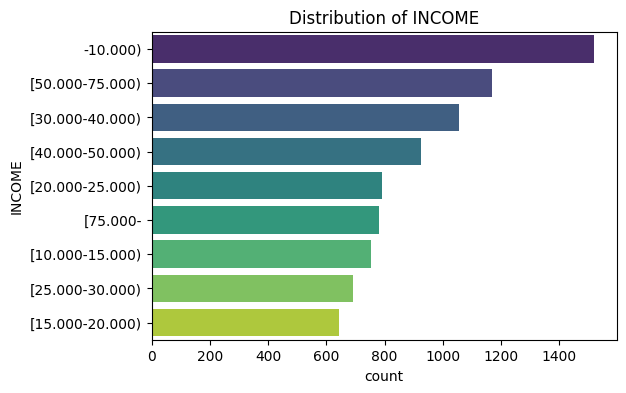

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


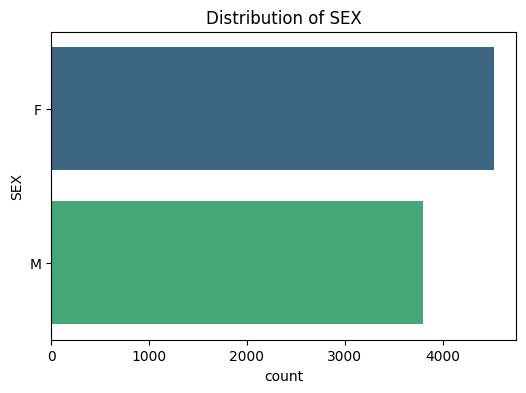

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


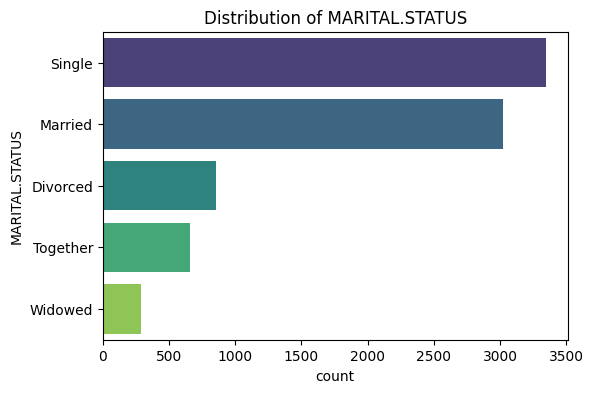

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


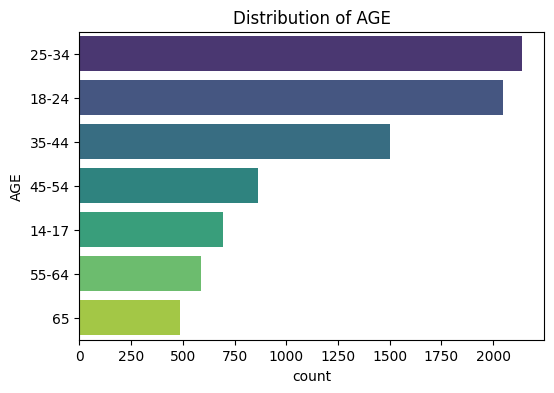

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


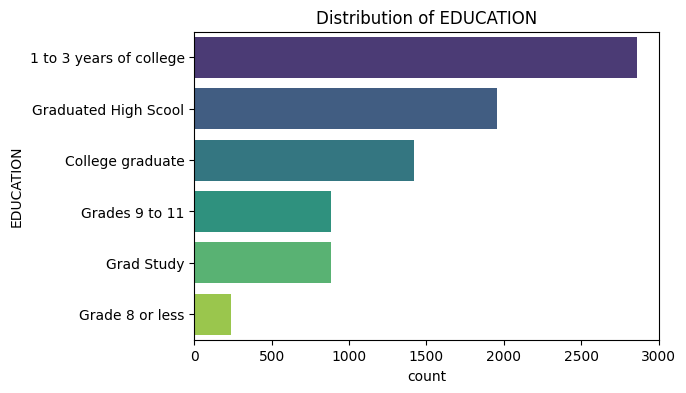

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


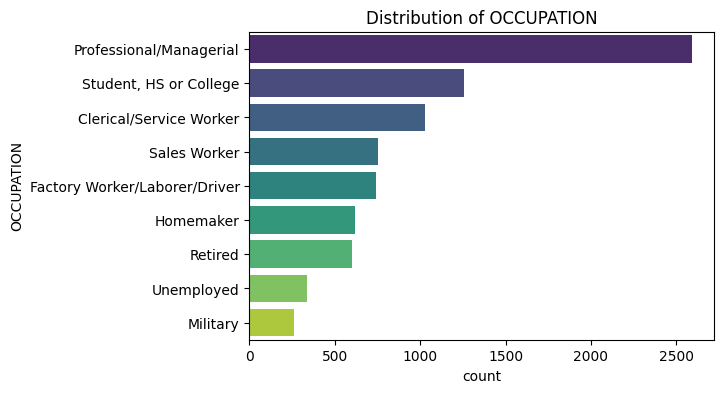

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


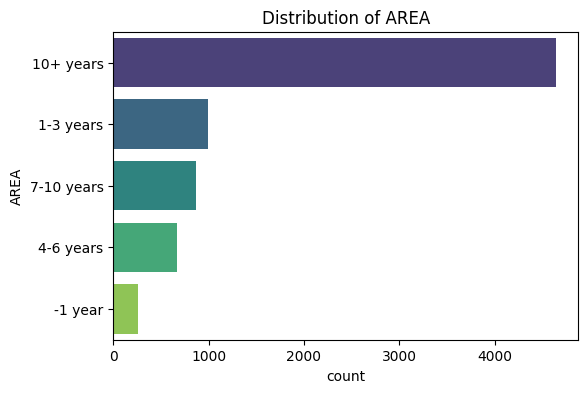

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


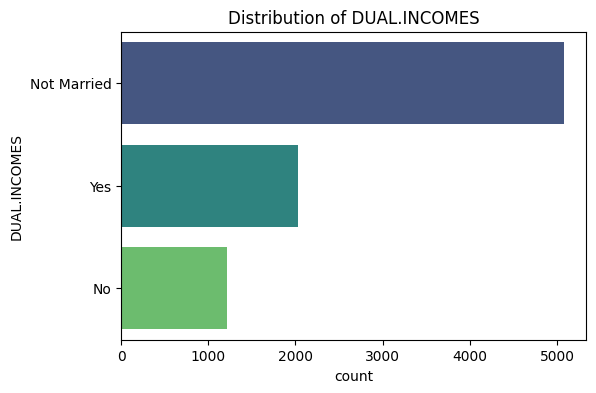

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


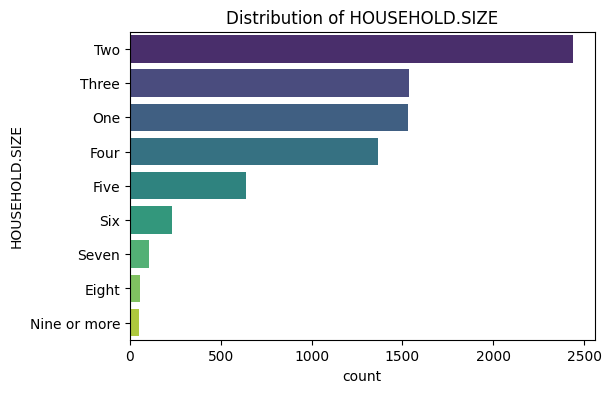

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


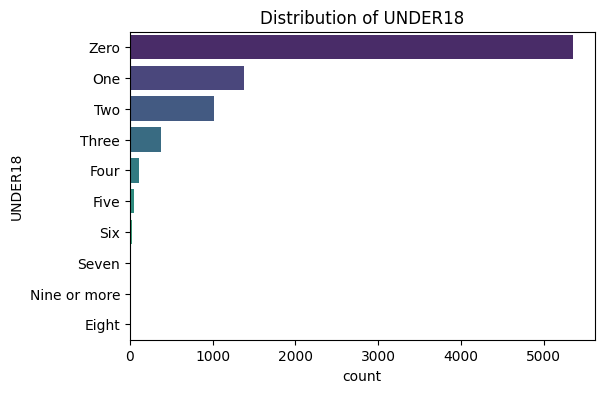

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


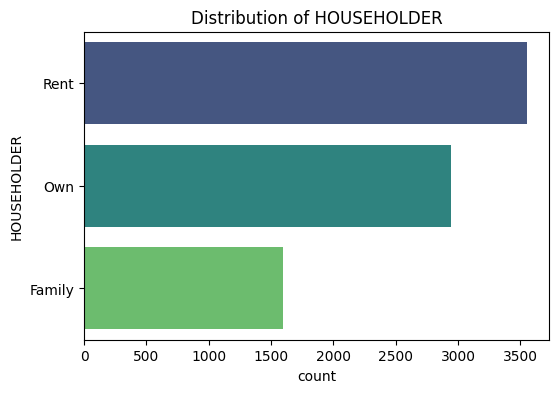

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


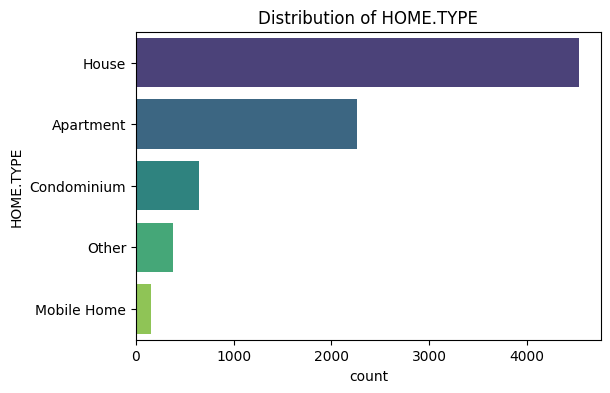

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


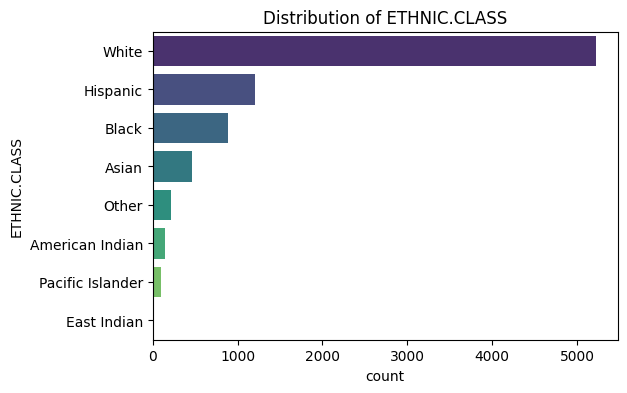

<ipython-input-59-62987a5209b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')


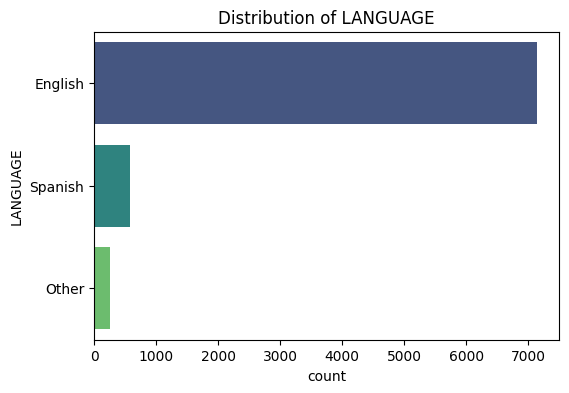

In [59]:
import seaborn as sns
for col in column_names:
  plt.figure(figsize=(6,4))
  sns.countplot(y=data[col],order=data[col].value_counts().index,palette='viridis')
  plt.title(f'Distribution of {col}')
  # plt.xticks(rotation=90)
  plt.show()

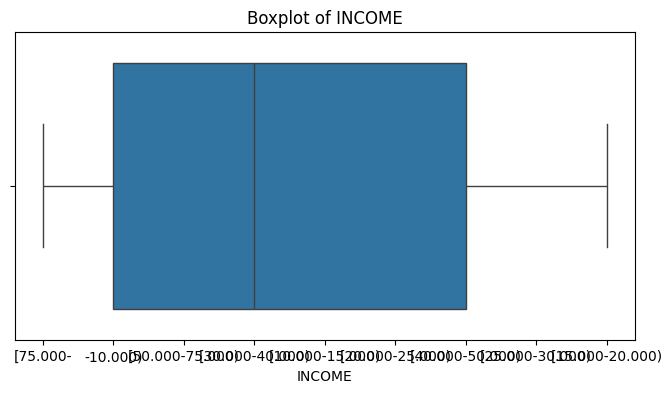

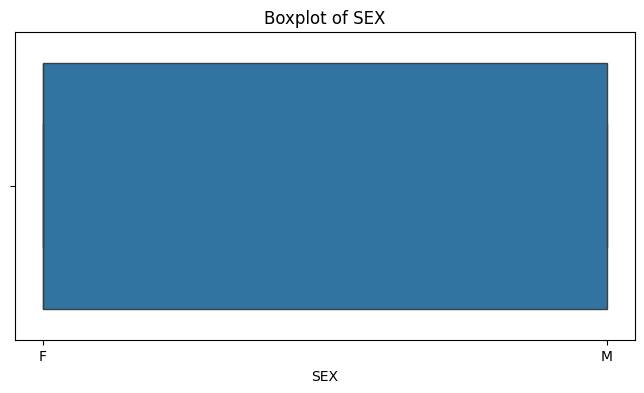

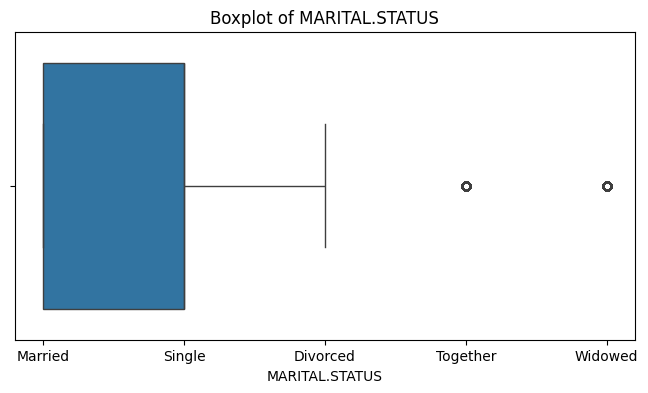

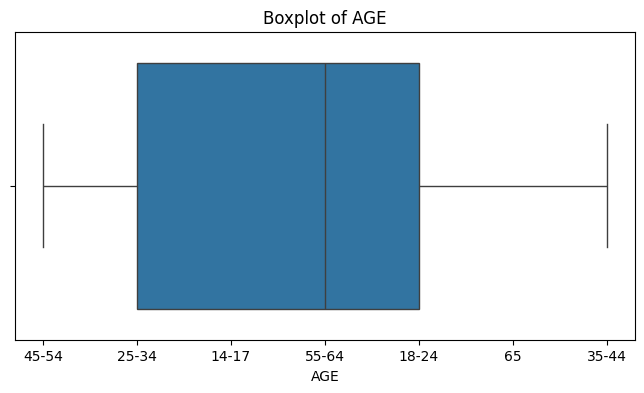

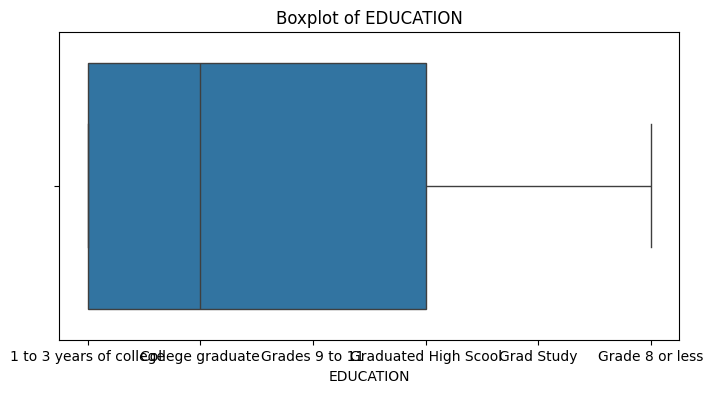

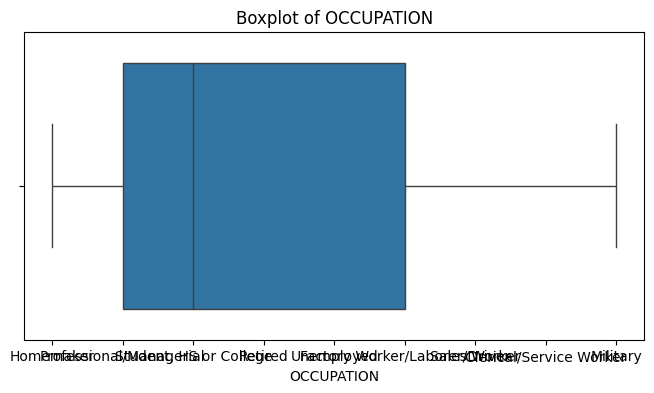

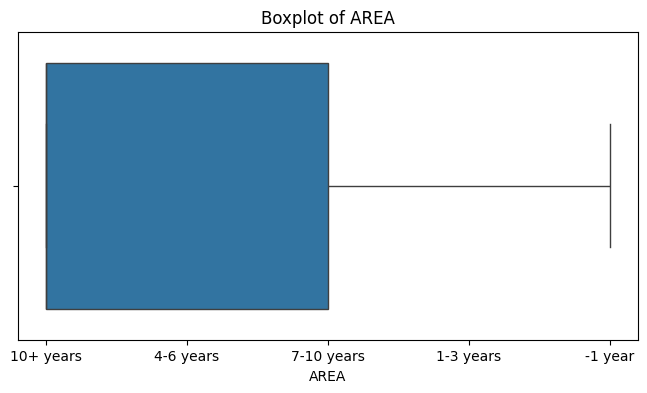

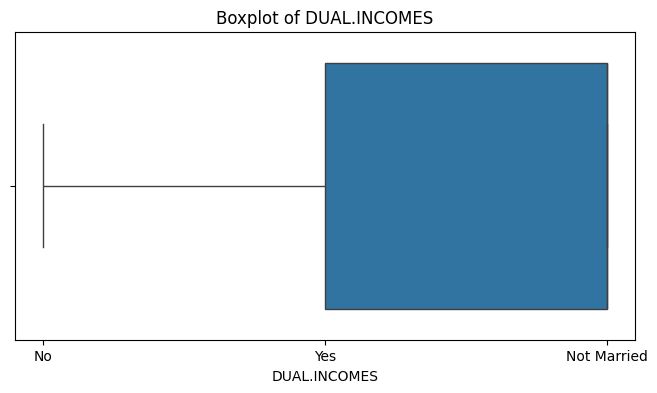

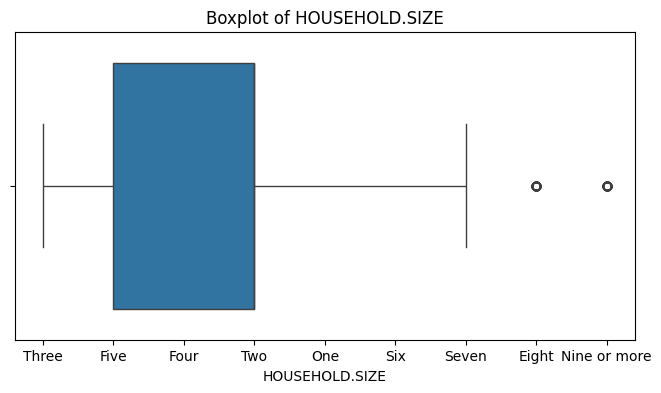

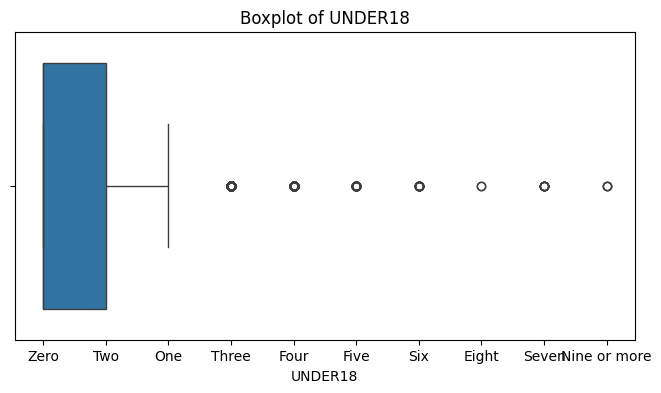

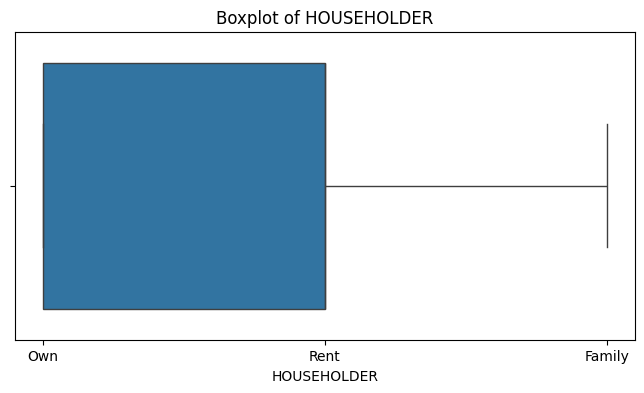

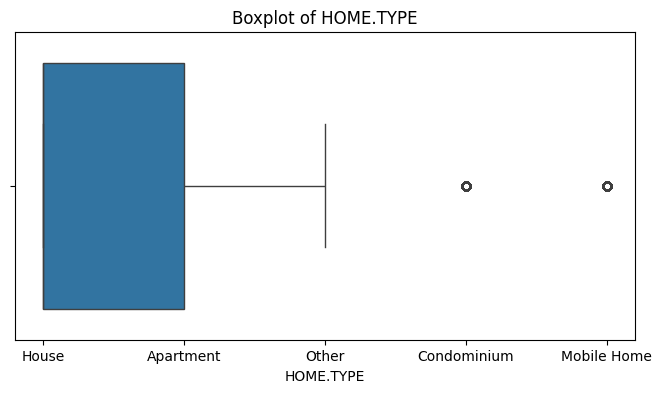

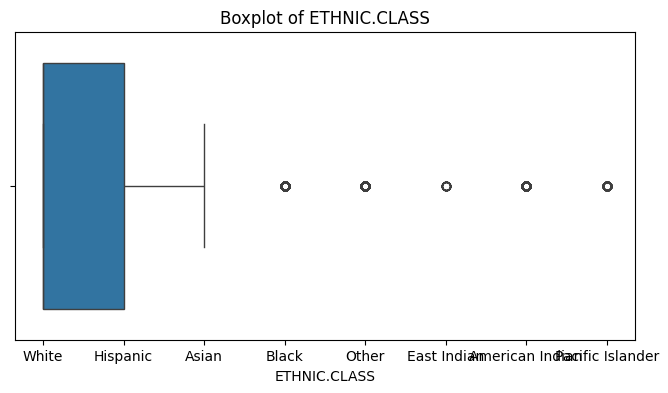

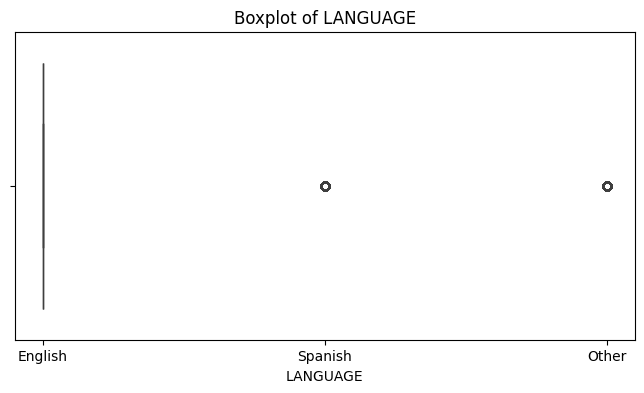

In [61]:
for col in column_names:
  plt.figure(figsize=(8,4))
  sns.boxplot(x=data[col])
  plt.title(f'Boxplot of {col}')
  print("\n")
  plt.show()


## Step 4: Bivariate Analysis

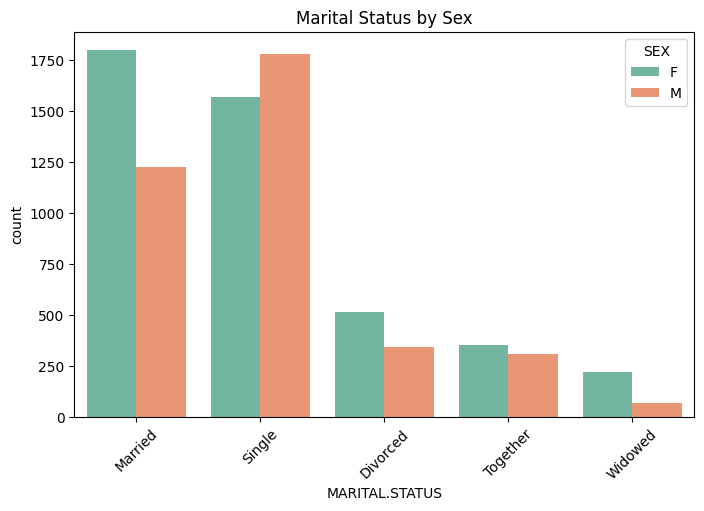

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(x="MARITAL.STATUS", hue="SEX", data=data, palette="Set2")
plt.xticks(rotation=45)
plt.title("Marital Status by Sex")
plt.show()

In [65]:
pd.crosstab(data["EDUCATION"], data["OCCUPATION"])

OCCUPATION,Clerical/Service Worker,Factory Worker/Laborer/Driver,Homemaker,Military,Professional/Managerial,Retired,Sales Worker,"Student, HS or College",Unemployed
EDUCATION,,,,,,,,,
1 to 3 years of college,457,260,199,93,885,187,288,387,75
College graduate,132,57,61,45,788,103,115,57,38
Grad Study,46,10,46,14,586,77,34,46,18
Grade 8 or less,4,24,24,2,8,12,7,122,24
Grades 9 to 11,52,96,57,7,30,28,85,429,76
Graduated High Scool,325,293,226,101,280,179,220,198,99


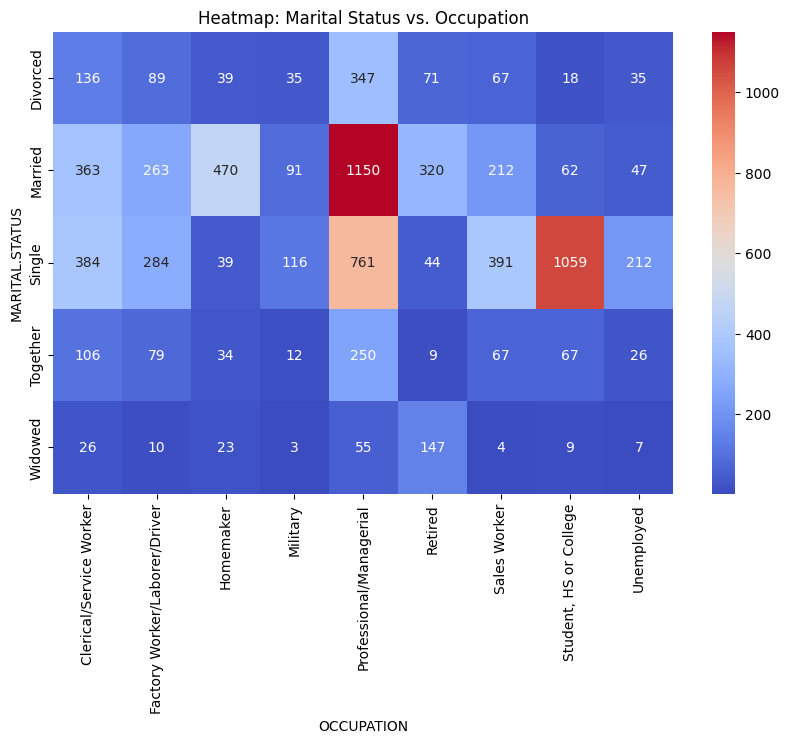

In [64]:
import seaborn as sns

cross_tab = pd.crosstab(data["MARITAL.STATUS"], data["OCCUPATION"])
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, cmap="coolwarm", fmt="d")
plt.title("Heatmap: Marital Status vs. Occupation")
plt.show()

In [66]:
# To check whether MARITAL.STATUS AND DUAL.INCOMES are independent or related
from scipy.stats import chi2_contingency

table = pd.crosstab(data["MARITAL.STATUS"], data["DUAL.INCOMES"])
chi2, p, dof, expected = chi2_contingency(table)

print(f"Chi-Square Test Statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant Relationship (Reject Null Hypothesis)")
else:
    print("No Significant Relationship (Fail to Reject Null)")

Chi-Square Test Statistic: 7182.712674172256
P-value: 0.0
Significant Relationship (Reject Null Hypothesis)


## Step 5: Multivariate Analysis

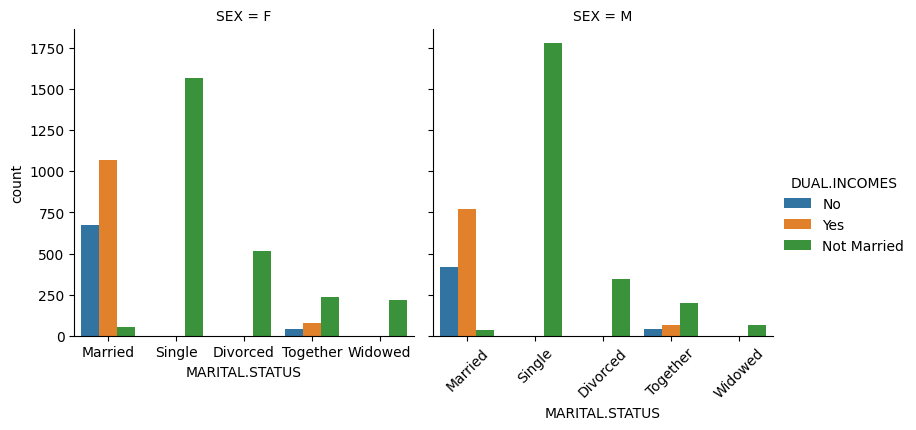

In [69]:
sns.catplot(x="MARITAL.STATUS", hue="DUAL.INCOMES", col="SEX", data=data, kind="count", height=4, aspect=1)
plt.xticks(rotation=45)
plt.show()